In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
%matplotlib inline 
!pip install tabulate

  Running setup.py bdist_wheel for tabulate: started
  Running setup.py bdist_wheel for tabulate: finished with status 'done'
  Stored in directory: C:\Users\Rajeev Ranjan\AppData\Local\pip\Cache\wheels\2a\85\33\2f6da85d5f10614cbe5a625eab3b3aebfdf43e7b857f25f829
Successfully built tabulate


twisted 17.9.0 has requirement Automat>=0.3.0, but you'll have automat 0.0.0 which is incompatible.


In [2]:
df=pd.read_csv("data_regression.csv")

In [3]:
X = df.drop(['Price'], axis = 1)
y= df.Price
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [4]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [5]:
predictions_2 =rf.predict(X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_2)))

RMSE: 320600.882013


In [8]:
from tabulate import tabulate
headers = ["name", "score"]
values = sorted(zip(X_train.columns, rf.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

name                                              score
Regionname_Southern Metropolitan            0.222602
Rooms                                       0.171465
Distance                                    0.150629
Landsize                                    0.0863379
Longtitude                                  0.0764177
Lattitude                                   0.0580556
Type_u                                      0.0509808
month                                       0.0280942
Regionname_Eastern Metropolitan             0.0268081
Type_h                                      0.0259056
Bathroom                                    0.0255643
Propertycount                               0.022007
Car                                         0.0119191
CouncilArea_Stonnington City Council        0.00761893
Method_S                                    0.00643984
Method_VB                                   0.00442839
Method_PI                                   0.00366356
Type_t                    

Parameter Tuning 

In [9]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [45]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 400, num = 5)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 500, num = 5)]
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}
pprint(random_grid)

{'max_depth': [10, 132, 255, 377, 500],
 'n_estimators': [10, 107, 205, 302, 400]}


In [74]:
error_depth = []
from sklearn.ensemble import RandomForestRegressor
for d in max_depth:
#for d in n_estimators:
    print(d)
    rf_best = RandomForestRegressor(random_state = 42,max_depth=d )  #For max_depth
    #rf_best = RandomForestRegressor(random_state = 42,n_estimators = d )  #For n_estimators
    rf_best.fit(X_train, y_train)
    predictions_best=rf_best.predict(X_test)
    error_depth.append( metrics.mean_squared_error(y_test, predictions_best))
    

10
132
255
377
500


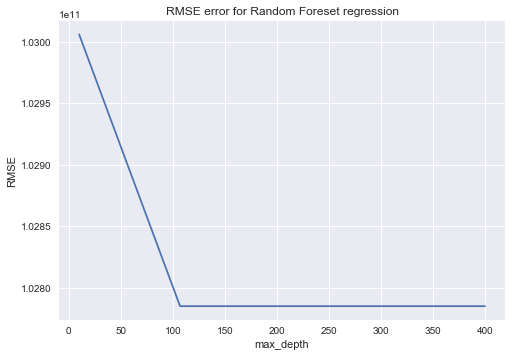

In [75]:
ax = plt.gca()

ax.plot(n_estimators, error_depth)
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.title('RMSE error for Random Foreset regression')
plt.axis('tight')
plt.savefig('Images/RMSE-m_depth-RF.png')
plt.show()

In [50]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.2min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'n_estimators': [10, 107, 205, 302, 400], 'max_depth': [10, 132, 255, 377, 500]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [51]:
rf_random.best_params_

{'max_depth': 500, 'n_estimators': 205}

In [52]:
from sklearn.ensemble import RandomForestRegressor
rf_best = RandomForestRegressor(max_depth =  500, n_estimators =  205)
rf_best.fit(X_train, y_train)
predictions_best=rf_best.predict(X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_best)))

RMSE: 304694.798413


In [55]:
train_sizes = [1, 100, 500, 1000, 2500, 5000]
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = RandomForestRegressor(max_depth =  500, n_estimators =  205), X = X_train,
                                                   y = y_train, train_sizes = train_sizes, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

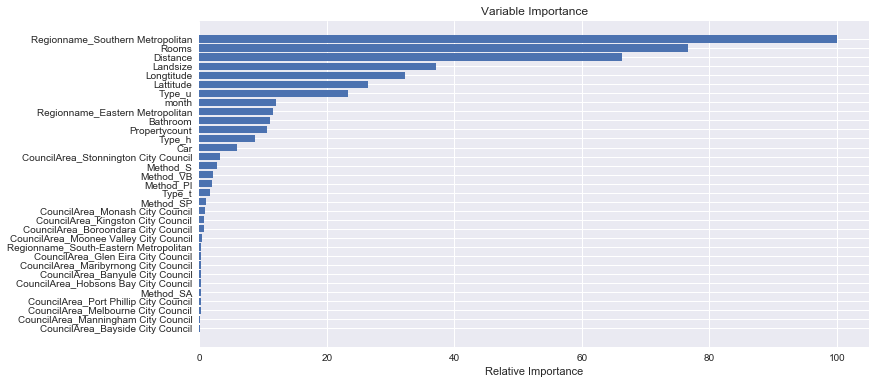

In [72]:
feature_importance = rf_best.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.barh(pos[25:], feature_importance[sorted_idx][25:], align='center')
plt.yticks(pos[25:], X.columns[sorted_idx][25:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.savefig('Images/Var_imp_RF.png')
plt.show()

In [66]:
pos

array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
        27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
        36.5,  37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44.5,
        45.5,  46.5,  47.5,  48.5,  49.5,  50.5,  51.5,  52.5,  53.5,
        54.5,  55.5,  56.5,  57.5])

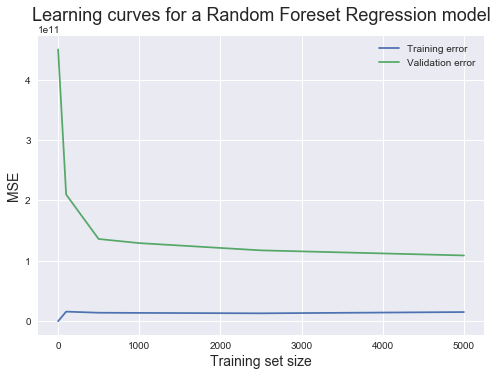

In [67]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Random Foreset Regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.savefig('Images\Learning_curve_RF.png')

